In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  

In [97]:
df = pd.read_csv('../data/fortune_global500_2023.csv')
print(df.head())
print(df.info())

df = pd.read_csv('../data/fortune_global500_2024.csv')
print(df.head())
print(df.info())

   RANK                      NAME REVENUES ($M) REVENUE PERCENT CHANGE  \
0     1                   Walmart      $611,289                   6.7%   
1     2              Saudi Aramco    $603,651.4                  50.8%   
2     3                State Grid    $530,008.8                  15.1%   
3     4                    Amazon      $513,983                   9.4%   
4     5  China National Petroleum    $483,019.2                  17.3%   

  PROFITS ($M) PROFITS PERCENT CHANGE ASSETS ($M)  EMPLOYEES CHANGE IN RANK  \
0      $11,680                 -14.6%    $243,197  2,100,000              -   
1     $159,069                    51%  $663,541.1     70,496              4   
2     $8,191.9                  14.8%  $710,763.1    870,287              -   
3      $-2,722                -108.2%    $462,675  1,541,000             -2   
4    $21,079.7                 118.7%  $637,222.9  1,087,049             -1   

   YEARS ON GLOBAL 500 LIST  
0                        29  
1                   

In [98]:

# تنظيف عمود الموظفين
df_2023["EMPLOYEES"] = df_2023["EMPLOYEES"].replace('[,]', '', regex=True).astype(float)

# تنظيف وتحويل "REVENUE PERCENT CHANGE"
df_2023["REVENUE PERCENT CHANGE"] = (
    df_2023["REVENUE PERCENT CHANGE"]
    .replace('%', '', regex=True)
    .replace('-', np.nan)
    .astype(float) / 100
)

# تنظيف وتحويل "PROFITS PERCENT CHANGE"
df_2023["PROFITS PERCENT CHANGE"] = (
    df_2024["PROFITS PERCENT CHANGE"]
    .replace('%', '', regex=True)
    .replace('-', np.nan)
    .astype(float) / 100
)

# طباعة أول الصفوف للتأكد
print(df_2023[["EMPLOYEES", "REVENUE PERCENT CHANGE", "PROFITS PERCENT CHANGE"]].head())


   EMPLOYEES  REVENUE PERCENT CHANGE  PROFITS PERCENT CHANGE
0  2100000.0                0.000007                0.000033
1    70496.0                0.000051                     NaN
2   870287.0                0.000015                0.000012
3  1541000.0                0.000009               -0.000024
4  1087049.0                0.000017               -0.000003


In [99]:

# تنظيف عمود الموظفين
df_2024["EMPLOYEES"] = df_2024["EMPLOYEES"].replace('[,]', '', regex=True).astype(float)

# تنظيف وتحويل "REVENUE PERCENT CHANGE"
df_2024["REVENUE PERCENT CHANGE"] = (
    df_2024["REVENUE PERCENT CHANGE"]
    .replace('%', '', regex=True)
    .replace('-', np.nan)
    .astype(float) / 100
)

# تنظيف وتحويل "PROFITS PERCENT CHANGE"
df_2024["PROFITS PERCENT CHANGE"] = (
    df_2024["PROFITS PERCENT CHANGE"]
    .replace('%', '', regex=True)
    .replace('-', np.nan)
    .astype(float) / 100
)

# طباعة أول الصفوف للتأكد
print(df_2024[["EMPLOYEES", "REVENUE PERCENT CHANGE", "PROFITS PERCENT CHANGE"]].head())


   EMPLOYEES  REVENUE PERCENT CHANGE  PROFITS PERCENT CHANGE
0  2100000.0                0.000006                0.000033
1  1525000.0                0.000012                     NaN
2  1361423.0                0.000003                0.000012
3    73311.0               -0.000018               -0.000024
4   513434.0               -0.000009               -0.000003


In [100]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 RANK                        0
NAME                        0
REVENUES ($M)               0
REVENUE PERCENT CHANGE      0
PROFITS ($M)                0
PROFITS PERCENT CHANGE      0
ASSETS ($M)                 0
EMPLOYEES                   0
CHANGE IN RANK              0
YEARS ON GLOBAL 500 LIST    0
dtype: int64


In [135]:
# The total revenue for each year was calculated by summing the values in the "REVENUES ($M)" column.
total_revenue_2023 = df_2023["REVENUES ($M)"].sum()
total_revenue_2024 = df_2024["REVENUES ($M)"].sum()
print(f"Total Revenue 2023: ${total_revenue_2023:,.2f}M, 2024: ${total_revenue_2024:,.2f}M")

Total Revenue 2023: $40,956,576.00M, 2024: $40,992,714.60M


In [137]:
# The top 20 companies top_revenue_2023.
top_revenue_2023 = df_2023.nlargest(20, "REVENUES ($M)")["NAME"]
print(top_revenue_2023)

0                                  Walmart
1                             Saudi Aramco
2                               State Grid
3                                   Amazon
4                 China National Petroleum
5                            Sinopec Group
6                              Exxon Mobil
7                                    Apple
8                                    Shell
9                       UnitedHealth Group
10                              CVS Health
11                         Trafigura Group
12    China State Construction Engineering
13                      Berkshire Hathaway
14                              Volkswagen
15                                  Uniper
16                                Alphabet
17                                McKesson
18                            Toyota Motor
19                           TotalEnergies
Name: NAME, dtype: object


In [139]:
# The top 20 companies top_revenue_2024.
top_revenue_2024 = df_2024.nlargest(20, "REVENUES ($M)")["NAME"]
print(top_revenue_2024)

0                                  Walmart
1                                   Amazon
2                               State Grid
3                             Saudi Aramco
4                            Sinopec Group
5                 China National Petroleum
6                                    Apple
7                       UnitedHealth Group
8                       Berkshire Hathaway
9                               CVS Health
10                              Volkswagen
11                             Exxon Mobil
12                                   Shell
13    China State Construction Engineering
14                            Toyota Motor
15                                McKesson
16                                Alphabet
17                                 Cencora
18                         Trafigura Group
19                        Costco Wholesale
Name: NAME, dtype: object


In [104]:
merged = df_2023.merge(df_2024, on="NAME", suffixes=("_2023", "_2024"))
avg_rank_change = (merged["RANK_2024"] - merged["RANK_2023"]).mean()
print(f"Average Rank Change: {avg_rank_change:.2f}")

Average Rank Change: 1.14


In [141]:
total_profits_2023 = df_2023["PROFITS ($M)"].sum()
total_profits_2024 = df_2024["PROFITS ($M)"].sum()
print(f"Total Profits 2023: ${total_profits_2023:,.2f}M, 2024: ${total_profits_2024:,.2f}M")

Total Profits 2023: $2,897,615.50M, 2024: $2,965,557.40M


In [106]:
avg_revenue_change = pd.Series({
    "2023": df_2023["REVENUE PERCENT CHANGE"].mean(),
    "2024": df_2024["REVENUE PERCENT CHANGE"].mean()
})

print(avg_revenue_change)


2023    0.000012
2024    0.000007
dtype: float64


In [107]:
merged["CHANGE IN RANK_2024"] = (
    merged["CHANGE IN RANK_2024"]
    .replace("-", np.nan)
    .astype(float)
)
rank_improved = len(merged[merged["CHANGE IN RANK_2024"] < 0])

print(f"Companies with Improved Rank: {rank_improved}")

Companies with Improved Rank: 216


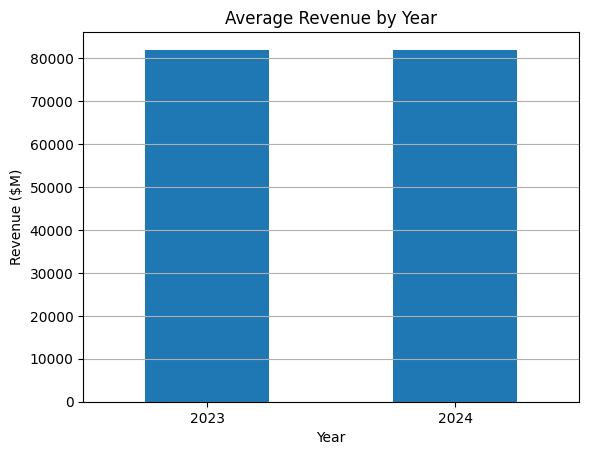

In [108]:
avg_revenue = pd.Series({
    "2023": df_2023["REVENUES ($M)"].mean(),
    "2024": df_2024["REVENUES ($M)"].mean()
})

avg_revenue.plot(kind="bar")
plt.title("Average Revenue by Year")
plt.ylabel("Revenue ($M)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [144]:
# The top 10 companies were selected based on the highest values in the "PROFITS ($M)" column for 2024.
top_profits_2024 = df_2024.nlargest(10, "PROFITS ($M)")["NAME"]
print(top_profits_2024)

3                              Saudi Aramco
6                                     Apple
8                        Berkshire Hathaway
16                                 Alphabet
25                                Microsoft
21    Industrial & Commercial Bank of China
20                           JPMorgan Chase
29                  China Construction Bank
65                           Meta Platforms
33               Agricultural Bank of China
Name: NAME, dtype: object


In [145]:
profit_vs_rank = merged.groupby("PROFITS PERCENT CHANGE_2024")["RANK_2024"].mean()
print(profit_vs_rank.head())

PROFITS PERCENT CHANGE_2024
-0.001299    378.0
-0.001280    431.0
-0.000999    291.0
-0.000385    333.0
-0.000317    464.0
Name: RANK_2024, dtype: float64


In [146]:
# The average number of employees for each year.
avg_employees = pd.Series({
    "2023": df_2023["EMPLOYEES"].mean(),
    "2024": df_2024["EMPLOYEES"].mean()
})
print(avg_employees)

2023    140238.810
2024    140999.638
dtype: float64


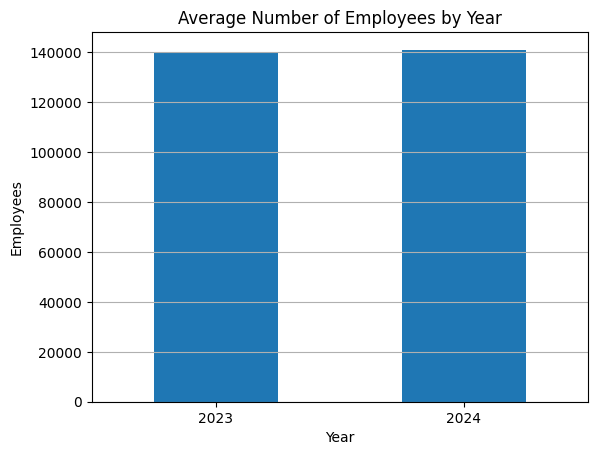

In [147]:
avg_employees.plot(kind="bar")
plt.title("Average Number of Employees by Year")
plt.ylabel("Employees")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [150]:
# The number of companies that had been listed on the Global 500 for more than 20 years was counted for each year.
long_listed_2023 = len(df_2023[df_2023["YEARS ON GLOBAL 500 LIST"] > 20])
long_listed_2024 = len(df_2024[df_2024["YEARS ON GLOBAL 500 LIST"] > 20])
print(f"Long-listed in 2023: {long_listed_2023}, 2024: {long_listed_2024}")

Long-listed in 2023: 229, 2024: 242


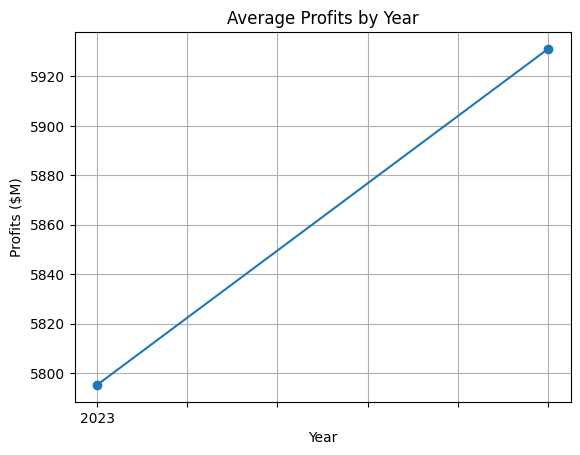

In [114]:
avg_profits = pd.Series({
    "2023": df_2023["PROFITS ($M)"].mean(),
    "2024": df_2024["PROFITS ($M)"].mean()
})

avg_profits.plot(kind="line", marker='o')
plt.title("Average Profits by Year")
plt.ylabel("Profits ($M)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [153]:
# The average revenue 2023 for each asset value by grouping the data based on the "ASSETS ($M)" column.
assets_vs_revenue_2023 = df_2023.groupby("ASSETS ($M)")["REVENUES ($M)"].mean()
print(assets_vs_revenue_2023.head())

ASSETS ($M)
2786.2     42305.6
5043.6     48716.9
7777.1     35154.6
8164.6     59043.1
10395.9    49480.8
Name: REVENUES ($M), dtype: float64


In [154]:
# The average revenue 2024 for each asset value by grouping the data based on the "ASSETS ($M)" column.
assets_vs_revenue_2024 = df_2024.groupby("ASSETS ($M)")["REVENUES ($M)"].mean()
print(assets_vs_revenue_2024.head())

ASSETS ($M)
2648.4     33944.1
7375.3     47710.6
8961.3     32634.1
10308.3    35701.8
10700.0    32984.2
Name: REVENUES ($M), dtype: float64


In [156]:
# The top 10 companies on the highest values in "PROFITS PERCENT CHANGE_2024".
top_profit_growth = merged.nlargest(10, "PROFITS PERCENT CHANGE_2024")["NAME"]
print(top_profit_growth)

165                    General Electric
71                Shandong Energy Group
454                          Salesforce
356                         Continental
332                         Tata Motors
229                    Bharat Petroleum
415    TongLing Nonferrous Metals Group
88                                Engie
311                            Swiss Re
354                              Xiaomi
Name: NAME, dtype: object


In [118]:
revenue_change_by_rank = merged.groupby("RANK_2024")["REVENUE PERCENT CHANGE_2024"].mean()
print(revenue_change_by_rank.head())

RANK_2024
1    0.000006
2    0.000012
3    0.000003
4   -0.000018
5   -0.000009
Name: REVENUE PERCENT CHANGE_2024, dtype: float64


In [119]:
employees_vs_profits_2023 = df_2023.groupby("EMPLOYEES")["PROFITS ($M)"].mean()
print(employees_vs_profits_2023.head())

EMPLOYEES
101.0       37.9
135.0      178.4
220.0     1250.5
1551.0    1428.0
3322.0    2160.9
Name: PROFITS ($M), dtype: float64


In [120]:
employees_vs_profits_2024 = df_2024.groupby("EMPLOYEES")["PROFITS ($M)"].mean()
print(employees_vs_profits_2024.head())

EMPLOYEES
141.0       40.5
3268.0     882.6
3526.0     954.5
3776.0    2140.5
4056.0     364.1
Name: PROFITS ($M), dtype: float64


In [121]:
high_revenue_growth_2024 = len(df_2024[df_2024["REVENUE PERCENT CHANGE"] > 0.10])
print(f"Companies with >10% Revenue Growth in 2024: {high_revenue_growth_2024}")

Companies with >10% Revenue Growth in 2024: 0


In [122]:
profit_improved_2024 = len(df_2024[df_2024["PROFITS PERCENT CHANGE"] > 0]) / len(df_2024) * 100
print(f"Percentage with Improved Profits in 2024: {profit_improved_2024:.2f}%")

Percentage with Improved Profits in 2024: 48.00%


In [157]:
#The average value of assets for each year, using the "ASSETS ($M)" column.
avg_assets = pd.Series({
    "2023": df_2023["ASSETS ($M)"].mean(),
    "2024": df_2024["ASSETS ($M)"].mean()
})

print(avg_assets)

2023    303971.1008
2024    334665.0436
dtype: float64


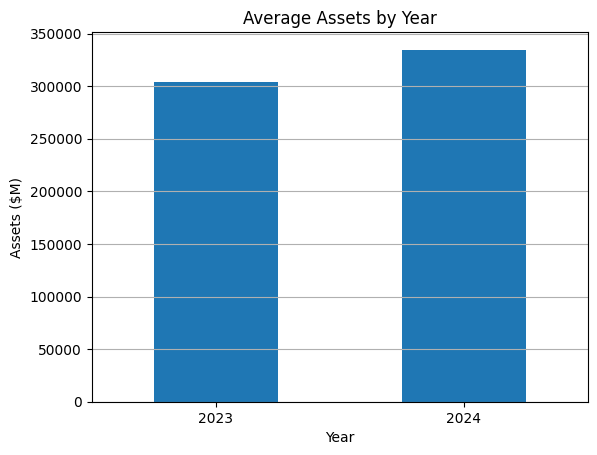

In [158]:
avg_assets.plot(kind="bar")
plt.title("Average Assets by Year")
plt.ylabel("Assets ($M)")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

In [125]:
years_vs_revenue_2023 = df_2023.groupby("YEARS ON GLOBAL 500 LIST")["REVENUES ($M)"].mean()
print(years_vs_revenue_2023.head())

YEARS ON GLOBAL 500 LIST
1     36632.982609
2     49899.031579
3     43974.258333
4     41169.300000
5    120647.500000
Name: REVENUES ($M), dtype: float64


In [126]:
total_employees = pd.Series({
    "2023": df_2023["EMPLOYEES"].sum(),
    "2024": df_2024["EMPLOYEES"].sum()
})
print(total_employees)

2023    70119405.0
2024    70499819.0
dtype: float64


In [127]:
merged["EMPLOYEES_CHANGE"] = merged["EMPLOYEES_2024"] - merged["EMPLOYEES_2023"]
top_employee_growth = merged.nlargest(5, "EMPLOYEES_CHANGE")["NAME"]
print(top_employee_growth)

2         State Grid
208              BYD
51            JD.com
439    Compass Group
99       CITIC Group
Name: NAME, dtype: object


In [128]:
revenue_by_rank_2024 = df_2024.groupby("RANK")["REVENUES ($M)"].mean()
print(revenue_by_rank_2024.head())

RANK
1    648125.0
2    574785.0
3    545947.5
4    494890.1
5    429699.7
Name: REVENUES ($M), dtype: float64


In [129]:
merged["ASSETS_CHANGE"] = merged["ASSETS ($M)_2024"] - merged["ASSETS ($M)_2023"]
top_asset_growth = merged.nlargest(5, "ASSETS_CHANGE")["NAME"]
print(top_asset_growth)

31                Agricultural Bank of China
341                                UBS Group
27     Industrial & Commercial Bank of China
28                   China Construction Bank
48                             Bank of China
Name: NAME, dtype: object


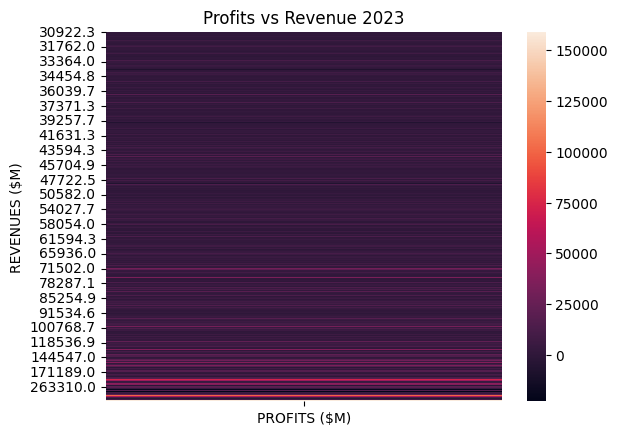

In [130]:
pivot_2023 = df_2023.pivot_table(values="PROFITS ($M)", index="REVENUES ($M)", aggfunc="mean")
sns.heatmap(pivot_2023)
plt.title("Profits vs Revenue 2023")
plt.show()

In [131]:
#the top 10 companies in 2023 based on revenues
top_10_2023 = df_2023.nlargest(10, "REVENUES ($M)")[["RANK", "NAME", "REVENUES ($M)"]]
print("Top 10 Companies in 2023:")
print(top_10_2023)

Top 10 Companies in 2023:
   RANK                      NAME  REVENUES ($M)
0     1                   Walmart       611289.0
1     2              Saudi Aramco       603651.4
2     3                State Grid       530008.8
3     4                    Amazon       513983.0
4     5  China National Petroleum       483019.2
5     6             Sinopec Group       471154.2
6     7               Exxon Mobil       413680.0
7     8                     Apple       394328.0
8     9                     Shell       386201.0
9    10        UnitedHealth Group       324162.0


In [132]:
#top 10 companies in 2024 based on revenues
top_10_2024 = df_2024.nlargest(10, "REVENUES ($M)")[["RANK", "NAME", "REVENUES ($M)"]]
print("\nTop 10 Companies in 2024:")
print(top_10_2024)


Top 10 Companies in 2024:
   RANK                      NAME  REVENUES ($M)
0     1                   Walmart       648125.0
1     2                    Amazon       574785.0
2     3                State Grid       545947.5
3     4              Saudi Aramco       494890.1
4     5             Sinopec Group       429699.7
5     6  China National Petroleum       421713.6
6     7                     Apple       383285.0
7     8        UnitedHealth Group       371622.0
8     9        Berkshire Hathaway       364482.0
9    10                CVS Health       357776.0


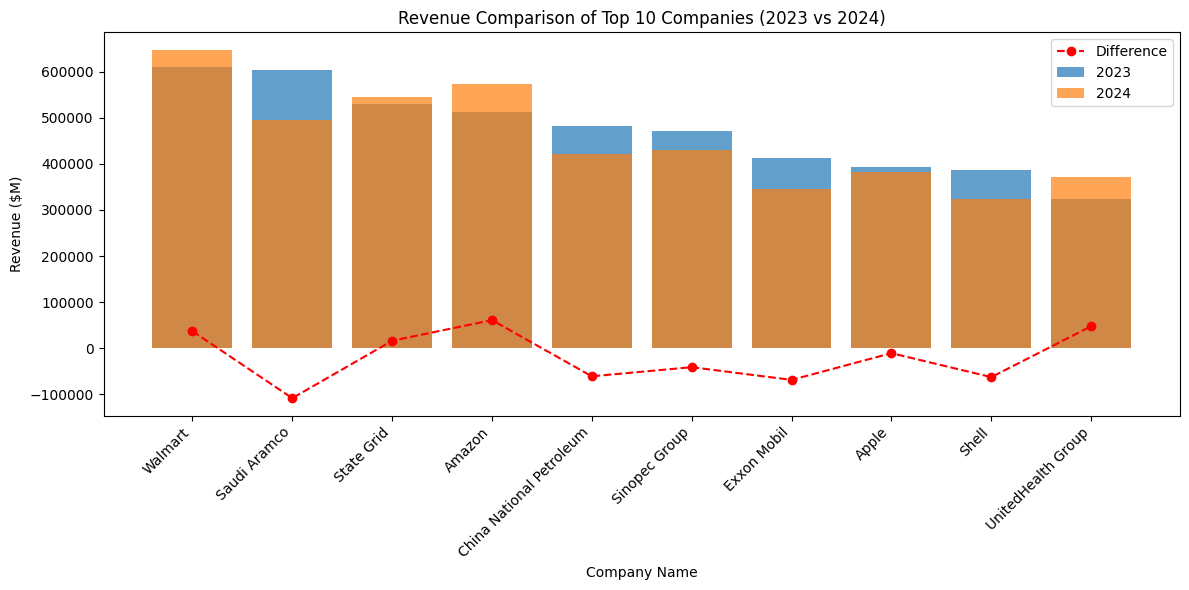

In [133]:
#compare common companies between 2023 and 2024
merged_df = df_2023.merge(df_2024, on="NAME", how="inner", suffixes=("_2023", "_2024"))
top_10_common = merged_df.nlargest(10, "REVENUES ($M)_2023")[["NAME", "REVENUES ($M)_2023", "REVENUES ($M)_2024"]]

#the revenue difference between 2024 and 2023 for the top 10 common companies
top_10_common["REVENUE_DIFFERENCE"] = top_10_common["REVENUES ($M)_2024"] - top_10_common["REVENUES ($M)_2023"]


plt.figure(figsize=(12, 6))
plt.bar(top_10_common["NAME"], top_10_common["REVENUES ($M)_2023"], label="2023", alpha=0.7)
plt.bar(top_10_common["NAME"], top_10_common["REVENUES ($M)_2024"], label="2024", alpha=0.7)
plt.plot(top_10_common["NAME"], top_10_common["REVENUE_DIFFERENCE"], marker='o', color='red', label="Difference", linestyle='--')

plt.title("Revenue Comparison of Top 10 Companies (2023 vs 2024)")
plt.xlabel("Company Name")
plt.ylabel("Revenue ($M)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()